In [2]:
from pathlib import Path
import typing
import yaml

In [3]:
import workingmem
import workingmem.model
from workingmem.task.SIR import SIRDataset, SIRConfig, SIRTokenizer
import transformer_lens, torch
from best_worst_models import best_worst

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
def interpolate_models(
    model1: typing.Union["transformer_lens.HookedTransformer", "torch.nn.Transformer"],
    model2: typing.Union["transformer_lens.HookedTransformer", "torch.nn.Transformer"],
    new_model,
    alpha: float,
):
    """
    Interpolate between two models in weight space.
    Args:
        model1: The first model.
        model2: The second model.
        alpha: The interpolation factor (0.0 = model1, 1.0 = model2).

    Returns:
        A new model with weights interpolated between model1 and model2.
    """
    # Create a new model with the same architecture as model1
    import copy

    # new_model = copy.deepcopy(model1)
    # new_model = type(model1)()

    params1 = model1.named_parameters()
    params2 = model2.named_parameters()

    dict_params1 = copy.deepcopy(dict(params1))

    for name2, param2 in params2:
        if name2 in dict_params1:
            dict_params1[name2].data.copy_(
                alpha * param2.data + (1 - alpha) * dict_params1[name2].data
            )

    for name1 in model1.state_dict():
        if name1 not in dict_params1:
            # print( f"Key {name1} not found in dict_params1. Using model1's value from state_dict.")
            dict_params1[name1] = model1.state_dict()[name1]

    new_model.load_state_dict(dict_params1)

    return new_model


def interpolate_SIR_models(
    model1: workingmem.model.ModelWrapper,
    model2: workingmem.model.ModelWrapper,
    alpha: float,
    d_vocab: int,
):
    import copy

    new_config = copy.deepcopy(model1.config)
    # new_config.from_pretrained = None
    new_config.d_vocab = d_vocab
    new_model = workingmem.model.ModelWrapper(new_config)
    new_model.model.to(device)

    interpolate_models(model1.model, model2.model, new_model.model, alpha)

    return new_model

In [ ]:
# r3c3sst = Path("../model_checkpoints/r02l0m2c").resolve()
# r3c3 = Path("../model_checkpoints/8l957ug3").resolve()
# r2c2l25sst = Path("../model_checkpoints/7qdu9mqj").resolve()
# r3c3l25sst = Path("../model_checkpoints/edun0q37").resolve()
ptrr2c2l14sst = Path("../model_checkpoints/nxgusfzl").resolve()


best1, best2, best3, worst1, worst2, worst3 = best_worst(ptrr2c2l14sst, 3)

Best models: [(PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/devoted-sweep-53'), 1.0), (PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/earnest-sweep-33'), 1.0), (PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/efficient-sweep-45'), 1.0)]
Worst models: [(PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/laced-sweep-46'), 0.9685714285714285), (PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/feasible-sweep-34'), 0.9632857142857143), (PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/sweet-sweep-48'), 0.9614285714285714)]


In [8]:
worst1

ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/sweet-sweep-48'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=None, init_weights=True, seed=None)

In [9]:
bestmodel1 = workingmem.model.ModelWrapper(best1)
bestmodel2 = workingmem.model.ModelWrapper(best2)
bestmodel3 = workingmem.model.ModelWrapper(best3)

worstmodel1 = workingmem.model.ModelWrapper(worst1)
worstmodel2 = workingmem.model.ModelWrapper(worst2)
worstmodel3 = workingmem.model.ModelWrapper(worst3)
# worstmodel.history[-1]

loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/devoted-sweep-53
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/devoted-sweep-53'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=None, init_weights=True, seed=None)


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/earnest-sweep-33
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/earnest-sweep-33'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=None, init_weights=True, seed=None)
loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/efficient-sweep-45
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/evcxg3kc/efficient-sweep-45'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=None, init_weights=True, seed=None)
loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits

Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda


In [12]:
dataset = SIRDataset.from_path(
    bestmodel1.history[-1]["dataset_path"], split="val", generate=True
)
dataset

FileNotFoundError: /oscar/data/frankmj/aalok/wm-computational-limits/datasets/SIRDataset_46BABD does not exist

In [ ]:
def get_loss_manifold(
    model1,
    model2,
    dataset,
    alpha_range=(0, 1.0),
    num_samples=10,
    d_vocab=None,
):
    losses = []
    accs = []
    for alpha in np.linspace(alpha_range[0], alpha_range[1], num_samples):
        int_model = interpolate_SIR_models(model1, model2, alpha, d_vocab=d_vocab)
        loss, acc = int_model.evaluate(dataset=dataset)
        losses += [loss]
        accs += [acc]
        # print(f"Alpha: {alpha}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
    return np.array(losses), np.array(accs)


get_loss_manifold(bestmodel1, bestmodel2, dataset, d_vocab=dataset.vocab_size)

loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


loading model from checkpoint: /oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16
any additional options passed via `ModelConfig` will be ingored!
	ModelConfig(from_pretrained=PosixPath('/oscar/data/frankmj/aalok/wm-computational-limits/model_checkpoints/nxgusfzl/absurd-sweep-16'), attn_only=True, n_layers=2, n_heads=2, n_ctx=500, d_model=128, d_mlp=0, act_fn='relu', d_vocab=350, init_weights=True, seed=None)


Moving model to device:  cuda
Moving model to device:  cuda


(array([7.31778931e-06, 6.08765046e-03, 4.73099053e-01, 1.08649382e+00,
        6.70279205e-01, 8.26687686e-01, 1.08673653e+00, 2.64212988e-01,
        8.74941121e-04, 2.29613164e-06]),
 array([1.        , 0.99792857, 0.87964286, 0.62628571, 0.5875    ,
        0.56435714, 0.57321429, 0.90278571, 0.99985714, 1.        ]))

In [ ]:
# using the three models bestmodel1, bestmodel2, and bestmodel, plot the triangular loss manifold in a 2D plane
def plot_loss_surface(
    model1, model2, model3, dataset, alpha_range=(0, 1.0), num_samples=10, d_vocab=None
):
    alpha_values = np.linspace(alpha_range[0], alpha_range[1], num_samples)

    loss_values = np.zeros((num_samples, num_samples))
    acc_values = np.zeros((num_samples, num_samples))
    # set all values to nan
    loss_values.fill(np.nan)
    acc_values.fill(np.nan)

    #  0,  0 denotes model1
    #  0, -1 denotes model2
    # -1, -1 denotes model3
    # the diagonal is between model2 and model3
    for i_outer in tqdm([*range(num_samples)]):
        int_1_2 = interpolate_SIR_models(
            model1, model2, alpha_values[i_outer], d_vocab=d_vocab
        )
        int_1_3 = interpolate_SIR_models(
            model1, model3, alpha_values[i_outer], d_vocab=d_vocab
        )
        losses, accs = get_loss_manifold(
            int_1_2,
            int_1_3,
            dataset,
            alpha_range=(0, 1.0),
            num_samples=i_outer + 1,
            d_vocab=d_vocab,
        )
        # now fill all the cells whose i + j = i_outer
        for i_inner in range(i_outer + 1):
            loss_values[i_inner, i_outer - i_inner] = np.round(losses[i_inner], 5)
            acc_values[i_inner, i_outer - i_inner] = np.round(accs[i_inner], 4)

    f, ax = plt.subplots(1, 2, figsize=(18, 10))

    def fmt(x):
        return f"{x:.2f}"

    from matplotlib.colors import LogNorm

    sns.heatmap(
        loss_values,
        ax=ax[0],
        cmap="Reds",
        cbar_kws={"label": "Loss"},
        xticklabels=[*map(fmt, alpha_values)],
        yticklabels=[*map(fmt, alpha_values)],
        # norm=LogNorm(),
        annot=True,
        fmt=".2f",
    )
    ax[0].set_title("Loss Surface")
    ax[0].set_xlabel("interpolation between model 3 and model 2")
    ax[0].set_ylabel("interpolation between model 3 and model 1")

    sns.heatmap(
        acc_values,
        ax=ax[1],
        cmap="Blues",
        cbar_kws={"label": "Accuracy"},
        xticklabels=[*map(fmt, alpha_values)],
        yticklabels=[*map(fmt, alpha_values)],
        norm=LogNorm(),
        annot=True,
        fmt=".2f",
    )
    ax[1].set_title("Accuracy Surface")

    plt.tight_layout()
    return f, ax


In [ ]:
# turn off logger
import logging

logging.getLogger("workingmem").setLevel(logging.ERROR)
logging.getLogger("transformer_lens").setLevel(logging.ERROR)

  0%|          | 0/20 [00:00<?, ?it/s]

Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving mod

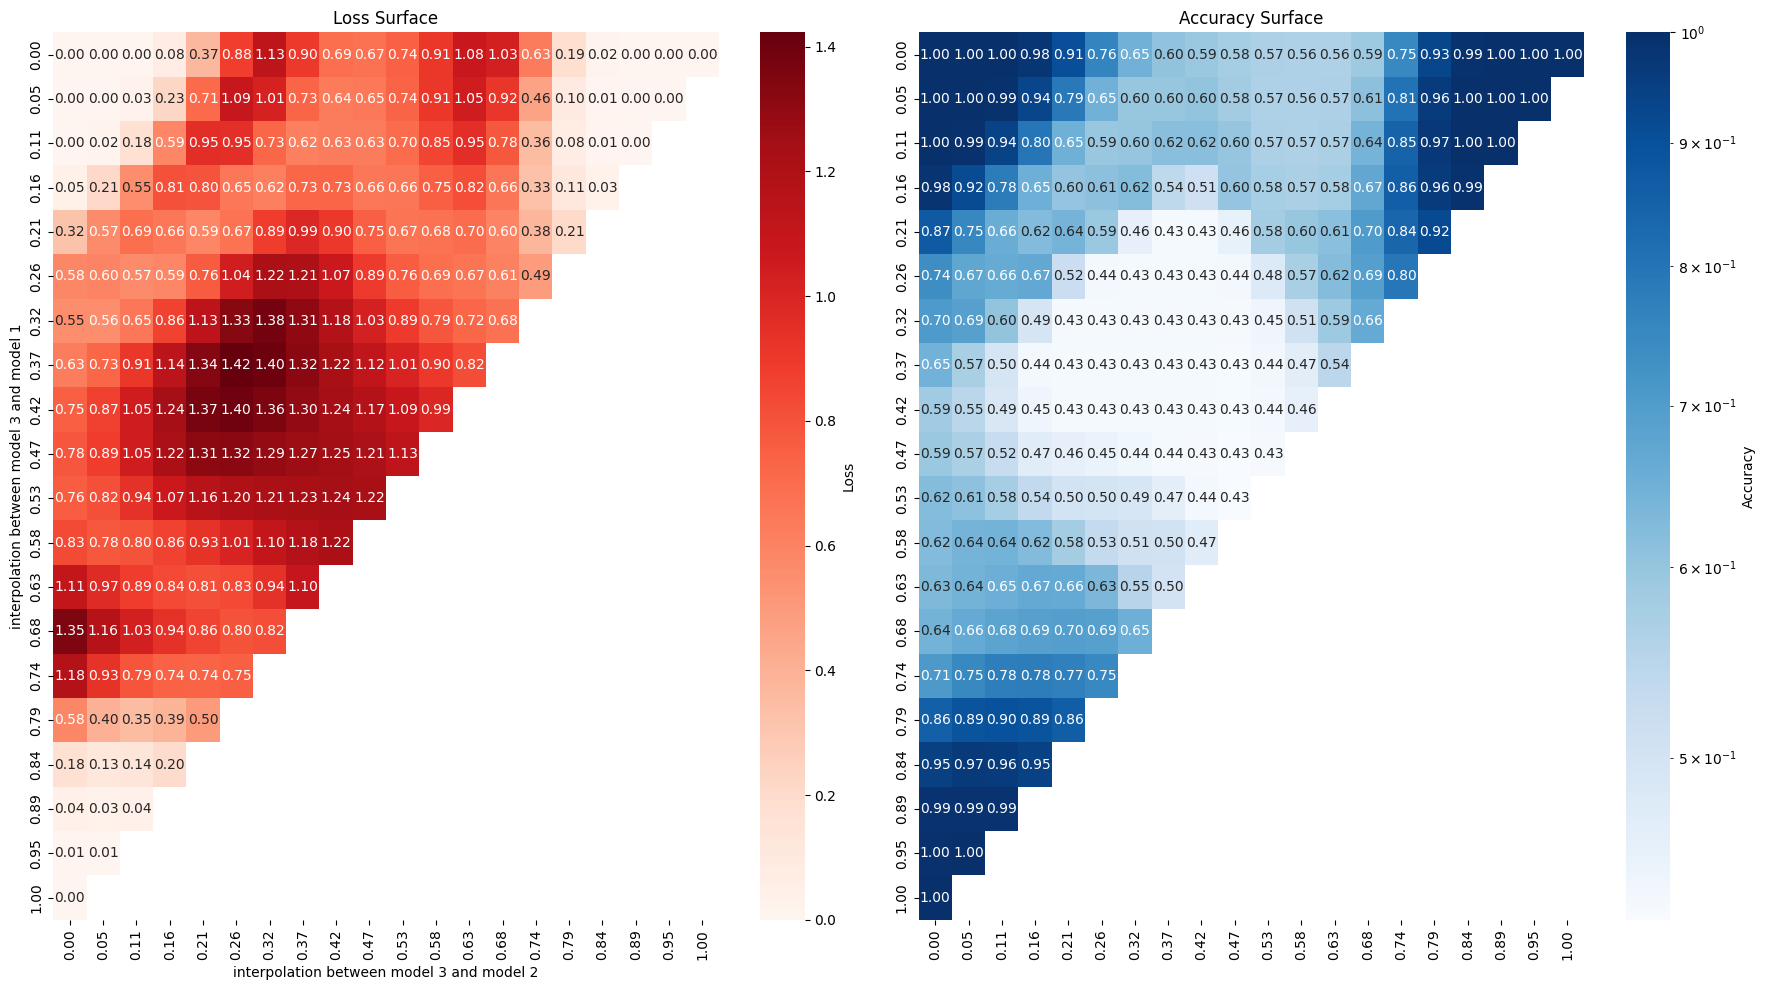

In [14]:
_ = plot_loss_surface(
    bestmodel1,
    bestmodel2,
    worstmodel1,
    dataset,
    alpha_range=(0, 1.0),
    num_samples=20,
    d_vocab=dataset.vocab_size,
)

Moving model to device:  cuda
Moving model to device:  cuda


Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving model to device:  cuda
Moving mod

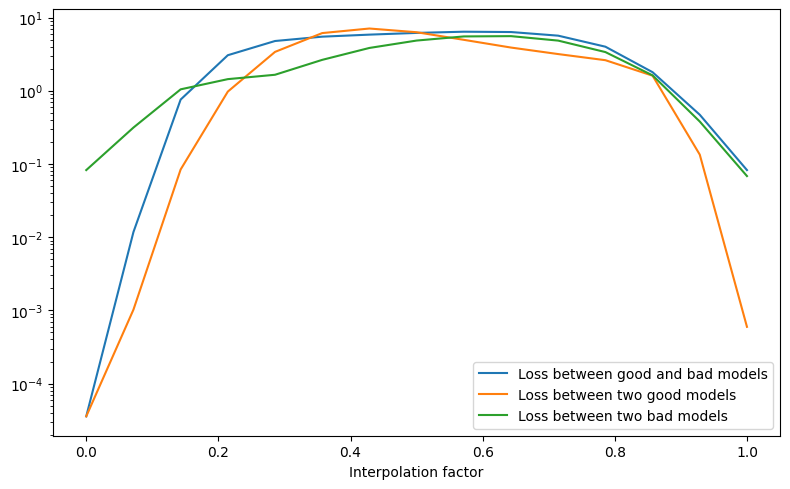

In [31]:
f, ax = plt.subplots(figsize=(8, 5))

start, end, samples = 0, 1.0, 15
x = np.linspace(start, end, samples)


def plot_loss_manifold(m1, m2, title):
    loss, acc = get_loss_manifold(
        m1,
        m2,
        dataset,
        alpha_range=(start, end),
        num_samples=samples,
        d_vocab=dataset.vocab_size,
    )
    ax.plot(x, loss, label=title)


plot_loss_manifold(bestmodel1, worstmodel1, "Loss between good and bad models")
plot_loss_manifold(bestmodel1, bestmodel2, "Loss between two good models")
# plot_loss_manifold(bestmodel1, bestmodel2, "Loss between two good models")
# plot_loss_manifold(worstmodel1, worstmodel2, "Loss between two bad models")
plot_loss_manifold(worstmodel1, worstmodel2, "Loss between two bad models")

ax.set_yscale("log")
ax.set_xlabel("Interpolation factor")
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
nm = interpolate_SIR_models(
    bestmodel,
    bestmodel,
    0.5,
    dataset.vocab_size,
)
nm.evaluate(dataset=dataset)